In [8]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylorentz import Momentum4, Position4

In [9]:
# tree_tt = uproot.open("/eos/user/d/dwinterb/SWAN_projects/Masters_CP/MVAFILE_AllHiggs_tt.root")["ntuple"]
tree_tt = uproot.open("../MVAFILE_AllHiggs_tt_new.root")["ntuple"]
print('loaded root file')
variables = [
            "wt_cp_sm", "wt_cp_ps", "wt_cp_mm", "rand",
            "aco_angle_1", 
            "mva_dm_1","mva_dm_2",
            "tau_decay_mode_1","tau_decay_mode_2",
            "ip_x_1", "ip_y_1", "ip_z_1", "ip_x_2", "ip_y_2", "ip_z_2",
            "pi_E_1", "pi_px_1", "pi_py_1", "pi_pz_1", 
            "pi2_E_1", "pi2_px_1", "pi2_py_1", "pi2_pz_1",
            "pi3_E_1", "pi3_px_1", "pi3_py_1", "pi3_pz_1",
            "pi_E_2", "pi_px_2", "pi_py_2", "pi_pz_2", 
            "pi2_E_2", "pi2_px_2", "pi2_py_2", "pi2_pz_2",
            "pi3_E_2", "pi3_px_2", "pi3_py_2", "pi3_pz_2",
            'sv_x_1', 'sv_y_1', 'sv_z_1', 'sv_x_2', 'sv_y_2','sv_z_2',
        ]
variables += ["gen_nu_p_1", "gen_nu_phi_1", "gen_nu_eta_1", #leading neutrino, gen level
            "gen_nu_p_2", "gen_nu_phi_2", "gen_nu_eta_2" #subleading neutrino, gen level
             ]

df_tt = tree_tt.pandas.df(variables)
print('loaded df')

loaded root file
loaded df


In [10]:
df_a1_a1 = df_tt[(df_tt['mva_dm_1']==10) & (df_tt['mva_dm_2']==10)]
df = df_a1_a1.drop(["mva_dm_1","mva_dm_2","tau_decay_mode_1","tau_decay_mode_2", "wt_cp_sm", "wt_cp_ps", "wt_cp_mm", "rand"], axis=1).reset_index(drop=True)

In [11]:
df.head()

,aco_angle_1,ip_x_1,ip_y_1,ip_z_1,ip_x_2,ip_y_2,ip_z_2,pi_E_1,pi_px_1,pi_py_1,...,sv_z_1,sv_x_2,sv_y_2,sv_z_2,gen_nu_p_1,gen_nu_phi_1,gen_nu_eta_1,gen_nu_p_2,gen_nu_phi_2,gen_nu_eta_2
0,6.117143,0.006238,-0.004234,0.006636,-0.003519,-0.000472,0.001458,5.463920,-4.324960,-2.038399,...,0.178732,0.224309,0.175644,0.615207,12.439656,-2.694677,0.498218,27.497826,0.621760,1.525403
1,3.297071,0.012066,0.004882,0.015056,-0.001900,-0.001342,0.000295,39.206211,29.270620,-16.989121,...,-0.530272,-0.066309,0.058633,-0.109475,2.536093,-0.428295,-0.487515,9.252467,2.453116,-1.111630
2,0.924842,0.004377,0.003232,0.000308,-0.000515,-0.000585,0.000942,30.358725,11.301172,-13.238619,...,-0.164217,-0.155510,0.175243,0.051742,18.037537,-0.796603,-1.167675,8.062246,2.322562,0.143439
3,3.661648,0.000310,0.001501,-0.000524,0.005408,-0.005452,-0.007149,19.221223,17.263894,0.244493,...,-0.049048,-1.102329,-1.106432,0.026094,17.809995,-0.010321,0.504604,2.451051,-2.454931,0.060119
4,4.637460,0.000256,-0.000595,-0.009137,-0.002936,-0.001267,-0.005894,33.953942,16.938983,-29.299663,...,-0.006299,-0.056976,0.109527,-0.009077,5.152344,-1.097308,0.062317,8.930094,2.108329,-0.016631


## to check - which variables are 0 or 9999'd in a1_a1

In [6]:
df['sv_x_1']

0        -0.310091
1         0.817724
2         0.078595
3        -0.093552
4         0.019370
            ...   
361671   -0.067273
361672   -0.141066
361673   -0.397078
361674   -0.531463
361675   -0.462973
Name: sv_x_1, Length: 361676, dtype: float64

In [12]:
# calc tau mom in lab frame
m_tau = 1.776 
c = 299792458
t_flight = 87e-6/c
p_conver = 1/(5.36e-19)
m_conver = 1.78266192e-27

p_x_tau_1 = -m_tau*m_conver*df['sv_x_1']/100/t_flight*p_conver
p_y_tau_1 = -m_tau*m_conver*df['sv_y_1']/100/t_flight*p_conver
p_z_tau_1 = -m_tau*m_conver*df['sv_z_1']/100/t_flight*p_conver
E_tau_1 = np.sqrt(p_x_tau_1**2+p_y_tau_1**2+p_z_tau_1**2+m_tau**2)
p_x_tau_2 = -m_tau*m_conver*df['sv_x_2']/100/t_flight*p_conver
p_y_tau_2 = -m_tau*m_conver*df['sv_y_2']/100/t_flight*p_conver
p_z_tau_2 = -m_tau*m_conver*df['sv_z_2']/100/t_flight*p_conver
E_tau_2 = np.sqrt(p_x_tau_2**2+p_y_tau_2**2+p_z_tau_2**2+m_tau**2)

In [13]:
# load gen information
tree_tt_gen = uproot.open("./MVAFILE_GEN_AllHiggs_tt.root")["ntuple"]
print('loaded root file')
variables = [
            "wt_cp_sm", "wt_cp_ps", "wt_cp_mm", "rand",
            "dm_1","dm_2",
#             "ip_x_1", "ip_y_1", "ip_z_1", "ip_x_2", "ip_y_2", "ip_z_2",
            "pi_E_1", "pi_px_1", "pi_py_1", "pi_pz_1", 
            "pi2_E_1", "pi2_px_1", "pi2_py_1", "pi2_pz_1",
            "pi3_E_1", "pi3_px_1", "pi3_py_1", "pi3_pz_1",
            "pi_E_2", "pi_px_2", "pi_py_2", "pi_pz_2", 
            "pi2_E_2", "pi2_px_2", "pi2_py_2", "pi2_pz_2",
            "pi3_E_2", "pi3_px_2", "pi3_py_2", "pi3_pz_2",
#             'sv_x_1', 'sv_y_1', 'sv_z_1', 'sv_x_2', 'sv_y_2','sv_z_2',
        ]

df_tt_gen = tree_tt_gen.pandas.df(variables)
print('loaded df')

loaded root file
loaded df


In [14]:
df_a1_a1_gen = df_tt_gen[(df_tt_gen['dm_1']==10) & (df_tt_gen['dm_2']==10)]
df_gen = df_a1_a1_gen.drop(["dm_1","dm_2","wt_cp_sm", "wt_cp_ps", "wt_cp_mm", "rand"], axis=1).reset_index(drop=True)

In [15]:
(nu_2[0]==9999).sum()

NameError: name 'nu_2' is not defined

In [16]:
def remove9999 (Momenta4, leading):
    if leading == 1:
        nu_ref = Momentum4.m_eta_phi_p(np.zeros(len(df["gen_nu_phi_1"])), df["gen_nu_eta_1"], df["gen_nu_phi_1"], df["gen_nu_p_1"])
    if leading == 2:
        nu_ref = Momentum4.m_eta_phi_p(np.zeros(len(df["gen_nu_phi_2"])), df["gen_nu_eta_2"], df["gen_nu_phi_2"], df["gen_nu_p_2"])
    
    array = np.array(Momenta4).T
    array = array[nu_ref.p_z != 9999]
    array = array.T
    return Momentum4(array[0], array[1], array[2], array[3])

In [17]:
# get tau vectors
# reco + gen neutrino
pi_1 = Momentum4(df['pi_E_1'], df["pi_px_1"], df["pi_py_1"], df["pi_pz_1"])
pi2_1 = Momentum4(df['pi2_E_1'], df["pi2_px_1"], df["pi2_py_1"], df["pi2_pz_1"])
pi3_1 = Momentum4(df['pi3_E_1'], df["pi3_px_1"], df["pi3_py_1"], df["pi3_pz_1"])
nu_1 = Momentum4.m_eta_phi_p(np.zeros(len(df["gen_nu_phi_1"])), df["gen_nu_eta_1"], df["gen_nu_phi_1"], df["gen_nu_p_1"])
pi_1 = remove9999(pi_1, 1)
pi2_1 = remove9999(pi2_1, 1)
pi3_1 = remove9999(pi3_1, 1)
nu_1 = remove9999(nu_1, 1)
tau_1 = pi_1 + pi2_1 + pi3_1 + nu_1

pi_2 = Momentum4(df['pi_E_2'], df["pi_px_2"], df["pi_py_2"], df["pi_pz_2"])
pi2_2 = Momentum4(df['pi2_E_2'], df["pi2_px_2"], df["pi2_py_2"], df["pi2_pz_2"])
pi3_2 = Momentum4(df['pi3_E_2'], df["pi3_px_2"], df["pi3_py_2"], df["pi3_pz_2"])
nu_2 = Momentum4.m_eta_phi_p(np.zeros(len(df["gen_nu_phi_2"])), df["gen_nu_eta_2"], df["gen_nu_phi_2"], df["gen_nu_p_2"])
pi_2 = remove9999(pi_2, 1)
pi2_2 = remove9999(pi2_2, 1)
pi3_2 = remove9999(pi3_2, 1)
nu_2 = remove9999(nu_2, 1)
tau_2 = pi_2 + pi2_2 + pi3_2 + nu_2

C:\Users\Stanley\.conda\envs\msci\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df.columns

In [48]:
np.random.seed(1)

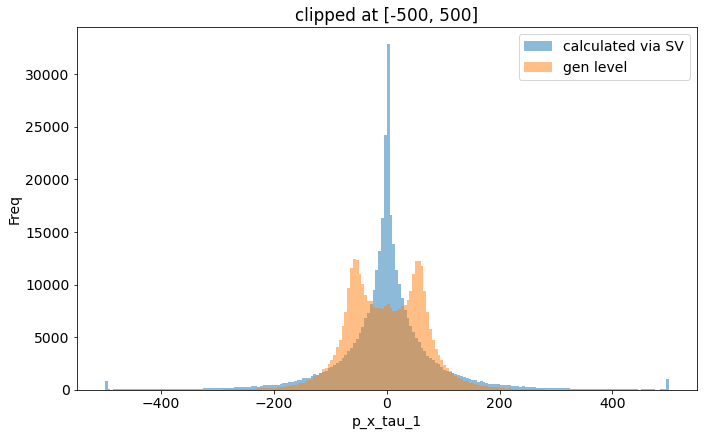

In [62]:
# %matplotlib inline
samples = min(len(p_z_tau_1), len(tau_1.p_z))
lower_lim = -500
upper_lim = 500
reco_plot = np.random.choice(p_x_tau_1, samples)
gen_plot = np.random.choice(tau_1.p_x, samples)
reco_plot = np.clip(reco_plot, lower_lim, upper_lim)
gen_plot = np.clip(gen_plot, lower_lim, upper_lim)
plt.hist(reco_plot, bins=200, alpha=0.5, label='calculated via SV')
plt.hist(gen_plot, bins=200, alpha=0.5, label='gen level')
plt.legend()
# plt.xlim(-1000,1000)
plt.xlabel('p_x_tau_1')
plt.ylabel('Freq')
plt.tight_layout()
# plt.savefig('sv_analysis/sv_a1_a1_check_p_x.png')
plt.title('clipped at [-500, 500]')
plt.show()

In [ ]:
p_z_tau_1.shape

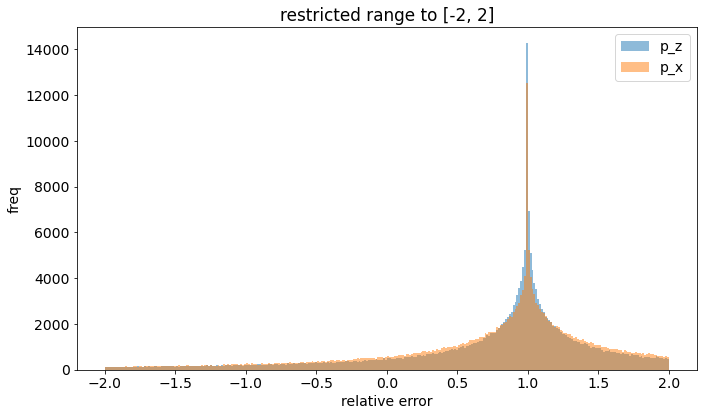

In [77]:
# %matplotlib inline
# np.random.seed(1)
upper_lim = 2
lower_lim = -2
reco = np.random.choice(p_z_tau_1,samples)
gen = np.random.choice(tau_1.p_z,samples)
rel_error = (gen-reco)/gen
rel_error_red = rel_error[np.where((rel_error >= lower_lim) & (rel_error <= upper_lim))]
# rel_error = np.clip(rel_error, lower_lim,upper_lim)
plt.hist(rel_error_red, bins=300, label='p_z', alpha=0.5)
# plt.legend()
# plt.xlim(-10,10)
reco = np.random.choice(p_x_tau_1,samples)
gen = np.random.choice(tau_1.p_x,samples)
rel_error = (gen-reco)/gen
rel_error_red = rel_error[np.where((rel_error >= lower_lim) & (rel_error <= upper_lim))]
# rel_error = np.clip(rel_error, lower_lim,upper_lim)
plt.hist(rel_error_red, bins=300, label='p_x', alpha=0.5)

plt.legend()
plt.xlabel('relative error')
plt.ylabel('freq')
plt.title('restricted range to [-2, 2]')
plt.tight_layout()
plt.savefig('sv_analysis/sv_a1_a1_check_rel_err.png')
plt.show()

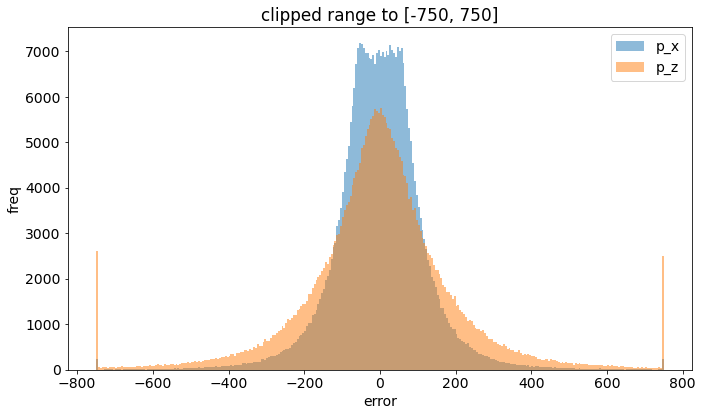

In [78]:
upper_lim = 750
lower_lim = -750
reco = np.random.choice(p_x_tau_1,samples)
gen = np.random.choice(tau_1.p_x,samples)
error = (gen-reco)
# rel_error_red = rel_error[np.where((rel_error >= lower_lim) & (rel_error <= upper_lim))]
error = np.clip(error, lower_lim, upper_lim)
plt.hist(error, bins=300, label='p_x', alpha=0.5)

reco = np.random.choice(p_z_tau_1,samples)
gen = np.random.choice(tau_1.p_z,samples)
error = (gen-reco)
# rel_error_red = rel_error[np.where((rel_error >= lower_lim) & (rel_error <= upper_lim))]
error = np.clip(error, lower_lim, upper_lim)
plt.hist(error, bins=300, label='p_z', alpha=0.5)

plt.legend()
# plt.xlim(-10,10)
plt.xlabel('error')
plt.ylabel('freq')
plt.title('clipped range to [-750, 750]')
plt.tight_layout()
plt.savefig('sv_analysis/sv_a1_a1_check_err.png')
plt.show()

In [133]:
(abs((gen-reco)/gen)<1).sum()/len((gen-reco)/gen)

0.3678181576880965